In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/tabela2_1.csv", sep=";", index_col="N")
df["Salario (x Sal Min)"] = df["Salario (x Sal Min)"].str.replace(",", ".").astype(float)

# Medidas Descritivas Associadas a Variáveis Quantitativas

## Dados Agrupados

In [3]:
df.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
N,,,,,,,
1,solteiro,ensino fundamental,NaN,"4,00",26,3,interior
2,casado,ensino fundamental,1.0,"4,56",32,10,capital
3,casado,ensino fundamental,2.0,"5,25",36,5,capital
4,solteiro,ensino médio,NaN,"5,73",20,10,outra
5,solteiro,ensino fundamental,NaN,"6,26",40,7,outra


In [88]:
classes = [0, 4, 8, 12, 16, 20, 24]
labels = [4, 8, 12, 16, 20, 24]

freq = pd.value_counts(
    pd.cut(x = df["Salario (x Sal Min)"],
           bins = classes,
           labels = labels,
           include_lowest = True))

freq = freq.reset_index().sort_values("index")
freq.rename(columns={"index": "Salario", "Salario (x Sal Min)": "Quantidade"}, inplace=True)
freq

,Salario,Quantidade
4,4,1
1,8,9
0,12,13
2,16,7
3,20,5
5,24,1


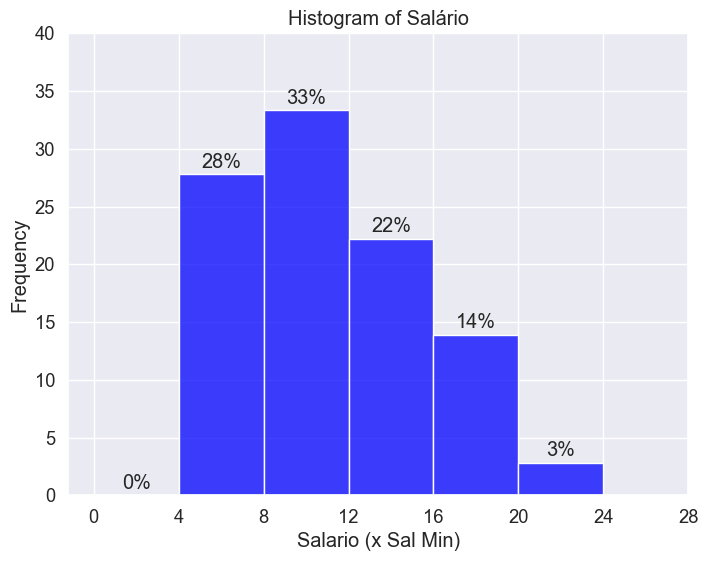

In [79]:
sns.histplot(x=df["Salario (x Sal Min)"], binwidth=4, binrange=(0, 24), stat="percent", color="blue")
sns.set_style("darkgrid")
plt.rc("figure", figsize=(8, 6))
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)
plt.xticks(np.arange(0, 30, step=4))
plt.yticks(np.arange(0, 45, step=5))
plt.ylabel('Frequency')
plt.title('Histogram of Salário')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}%', xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')

plt.show()


In [3]:
df.columns

Index(['Estado Civil', 'Grau de Instrução', 'N de Filhos',
       'Salario (x Sal Min)', 'Anos', 'Meses', 'Região de Procedência'],
      dtype='object')